<a href="https://colab.research.google.com/github/WallasMarcelo/Reduzir_dimensonalidade_imagem/blob/main/dimensionalidade_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conectando ao google drive e abrindo o aarquivo de imagem

In [2]:
from google.colab import drive
from PIL import Image

drive.mount('/content/drive')
imagem_original = Image.open("/content/drive/My Drive/floresta-amazonica.png").convert('RGB')


Mounted at /content/drive


Função para obter os valores x e y através da largura da imagem original e da variavel i que é o contador do loop for

In [3]:
def obterXY(i,largura):
  x = i % largura
  y = i // largura
  return x,y


Função para converter os valores RGB da imagem original para tons de cinza

In [6]:
def calcularValoresRGB(Imagem,x,y):
   r, g, b = imagem_original.getpixel((x, y))
   return int(0.299 * r + 0.587 * g + 0.114 * b)



Função que verifica do ton da imagem para atribuir os valores 0 ou 1 para atribuir a imagem binarizada   

In [5]:
def binarizar(valor_cinza, limiar=127):
  return 1 if valor_cinza > limiar else 0


Função que cria as imagens tons de cinza e binarizada, e atribui seus respectivos valores atrvés de conversões da imagem original

In [11]:
def converter_imagem(imagem_original):
  largura, altura = imagem_original.size

  imagem_cinza = Image.new(mode='RGB', size=(largura, altura))  # Escala de cinza
  imagem_binaria = Image.new(mode="1", size=(largura, altura))  # Binária

  for i in range(largura * altura):
      x, y = obterXY(i,largura)

      valor_cinza = calcularValoresRGB(imagem_original,x,y)
      valor_binario = binarizar(valor_cinza)

      imagem_cinza.putpixel((x, y), (valor_cinza,valor_cinza,valor_cinza))
      imagem_binaria.putpixel((x, y), valor_binario)


  return imagem_cinza, imagem_binaria




Chama a função converter imagem, atribuindo as imagens tons de cinza e binarizada, em seguida as prota na tela

Imagem Original:


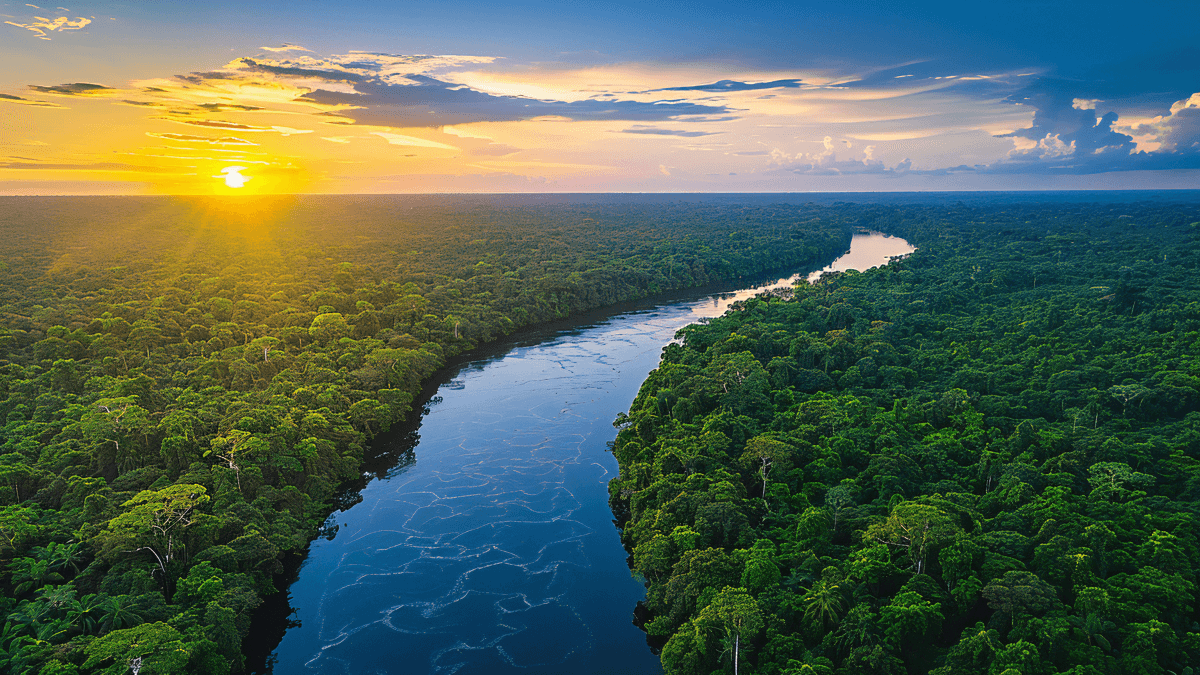

Imagem em Tons de Cinza: 


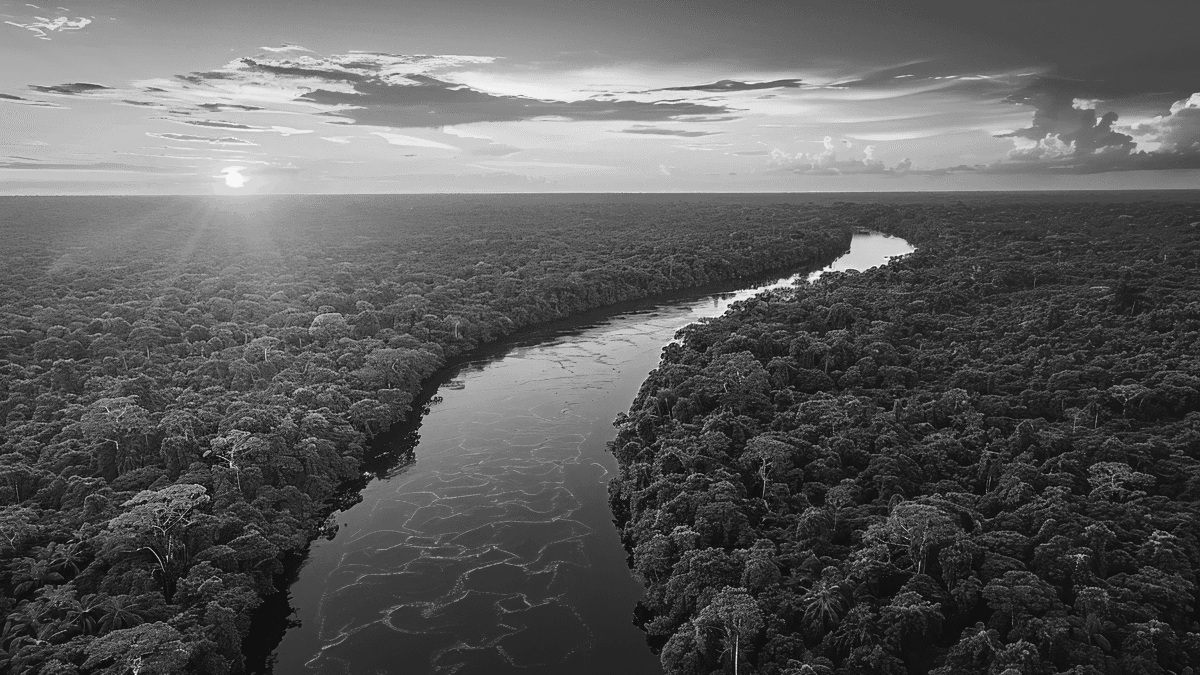

Imagem Binarizada:


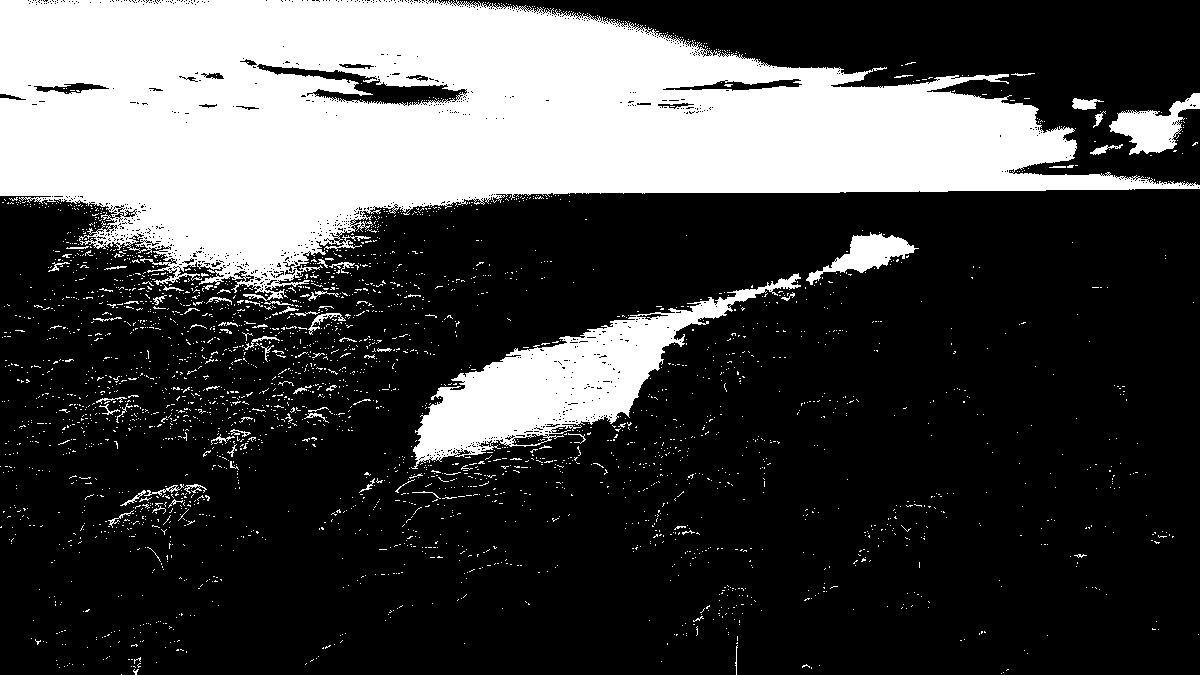

In [12]:
from IPython.display import display

#Função para converter imagem original em tons de cinza e binario
imagem_cinza, imagem_binaria = converter_imagem(imagem_original)


# Exibir as imagens processadas
print("Imagem Original:")
display(imagem_original)

print("Imagem em Tons de Cinza: ")
display(imagem_cinza)

print("Imagem Binarizada:")
display(imagem_binaria)

